In [134]:
import ee
import geemap
from geemap import ml
from sklearn import ensemble
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializa la autenticación y la inicialización de Google Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-facuboladerasgee')

In [208]:
import os

def combine_csv_files(folder_path):
    # Lista para almacenar todos los DataFrames
    df_list = []
    
    # Recorrer todos los archivos en la carpeta
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            # Leer cada archivo CSV y agregarlo a la lista
            df = pd.read_csv(file_path)
            df_list.append(df)
    
    # Combinar todos los DataFrames en uno solo
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df

# Ejemplo de uso
folder_path_2019 = 'C://Users//Facu//Downloads//EE_malawi_2019'
combined_df_2019 = combine_csv_files(folder_path_2019)


folder_path_2020 = 'C://Users//Facu//Downloads//EE_malawi_2020'
combined_df_2020 = combine_csv_files(folder_path_2020)


folder_path_2021 = 'C://Users//Facu//Downloads//EE_malawi_2021'
combined_df_2021 = combine_csv_files(folder_path_2021)

combined_df = pd.concat([combined_df_2019, combined_df_2020, combined_df_2021], ignore_index=True)


In [209]:
# Calcular la nueva columna 'threshold'
# Calcular la nueva columna 'threshold'
combined_df['threshold'] = (combined_df['agbd_se'] / combined_df['agbd']) * 100
# combined_df = combined_df.loc[combined_df['Slope'] <= 25]

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34513 entries, 0 to 34512
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  34513 non-null  int64  
 1   B11           34513 non-null  float64
 2   B12           34513 non-null  float64
 3   B2            34513 non-null  float64
 4   B3            34513 non-null  float64
 5   B4            34513 non-null  float64
 6   B8            21099 non-null  float64
 7   CH            34513 non-null  float64
 8   MNDWI         34513 non-null  float64
 9   NDBI          34513 non-null  float64
 10  NDVI          34513 non-null  float64
 11  RVI           34513 non-null  float64
 12  VH            34513 non-null  float64
 13  VV            34513 non-null  float64
 14  VV_VH_div_2   34513 non-null  float64
 15  VV_div_VH     34513 non-null  float64
 16  VV_minus_VH   34513 non-null  float64
 17  VV_plus_VH    34513 non-null  float64
 18  agbd          34513 non-nu

In [210]:
# Filtrar los datos cuyo valor en la columna 'threshold' sea menor que 50
df_filtered = combined_df[combined_df['threshold'] < 50]

# Mostrar las primeras filas del DataFrame filtrado para verificar
df_filtered.describe()

,system:index,B11,B12,B2,B3,B4,B8,CH,MNDWI,NDBI,...,VV_VH_div_2,VV_div_VH,VV_minus_VH,VV_plus_VH,agbd,agbd_se,elevation,label,slope,threshold
count,16073.000000,16073.000000,16073.000000,16073.000000,16073.000000,16073.000000,9001.000000,16073.000000,16073.000000,16073.000000,...,16073.000000,16073.000000,16073.000000,16073.000000,16073.000000,16073.000000,16073.000000,16073.000000,16073.000000,16073.000000
mean,362.420519,2460.210393,1692.418826,476.730043,711.811181,791.556102,2439.184444,6.430287,-0.550016,0.020996,...,-13.712954,0.611533,6.518767,-27.425909,59.245644,4.942996,925.032166,3.551111,12.340421,18.144656
std,326.666183,490.943899,545.701961,120.048742,146.090862,284.391938,431.306977,7.872286,0.040865,0.131282,...,1.766643,0.063022,0.691058,3.533286,77.711104,4.599475,402.646691,1.950781,12.291360,13.374165
min,0.000000,572.000000,276.000000,95.000000,105.000000,88.000000,688.000000,0.000000,-0.732824,-0.470652,...,-23.574024,-0.482797,3.180486,-47.148050,6.005444,2.981795,474.000000,1.000000,0.000000,0.491117
25%,112.000000,2150.500000,1292.000000,405.000000,630.750000,586.000000,2155.000000,0.000000,-0.577431,-0.063266,...,-14.555476,0.587941,6.067083,-29.110952,11.980653,2.983951,587.000000,1.000000,2.669578,6.966392
50%,261.000000,2487.500000,1706.000000,474.500000,711.000000,805.500000,2375.000000,3.000000,-0.554544,0.046478,...,-13.661608,0.616794,6.394846,-27.323215,25.837830,2.989102,784.000000,5.000000,6.948957,14.749080
75%,520.000000,2792.000000,2077.000000,541.000000,789.500000,980.500000,2621.750000,11.000000,-0.526222,0.120987,...,-12.825425,0.646398,6.831840,-25.650850,73.895240,4.173676,1201.000000,5.000000,19.667364,27.173584
max,1560.000000,5009.000000,3841.000000,1289.000000,1688.000000,2010.000000,5134.500000,34.000000,-0.178288,0.346198,...,-1.801977,0.873611,11.055733,-3.603953,873.749760,17.173664,2061.000000,7.000000,68.069534,49.811787


In [211]:
def remove_outliers(df, column_name):

    # Calcular la media y la desviación estándar de la columna
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    
    # Calcular el umbral para identificar los outliers
    threshold = 3 * std_dev
    
    # Crear una condición para filtrar los outliers
    condition = (df[column_name] >= (mean - threshold)) & (df[column_name] <= (mean + threshold))
    
    # Crear un nuevo DataFrame con los outliers eliminados
    df_filtered = df[condition]
    
    return df_filtered

# Ejemplo de uso
# Supongamos que tienes un DataFrame llamado df_combined con una columna "agbd"
# df_combined = pd.read_csv("ruta_a_tu_csv.csv")

df_filtered_remove = remove_outliers(df_filtered, "agbd")

# Mostrar las primeras filas del DataFrame filtrado
df_filtered_remove

,system:index,B11,B12,B2,B3,B4,B8,CH,MNDWI,NDBI,...,VV_div_VH,VV_minus_VH,VV_plus_VH,agbd,agbd_se,elevation,label,slope,.geo,threshold
3,3,1921.8334,1381.80,523.00000,774.7500,826.20,2293.5000,9.0,-0.425384,-0.088170,...,0.613979,6.524582,-27.279684,16.890486,2.982532,626.0,4.0,2.134969,"{""geodesic"":false,""type"":""Point"",""coordinates""...",17.658059
4,4,1933.0000,1355.50,499.50000,707.0000,805.00,1951.0000,9.0,-0.464394,-0.004634,...,0.614849,6.522845,-27.348764,16.890486,2.982532,626.0,4.5,2.134969,"{""geodesic"":false,""type"":""Point"",""coordinates""...",17.658059
5,5,2929.0000,2005.75,573.33330,810.5000,987.75,2631.6667,4.0,-0.566520,0.053471,...,0.617111,6.456994,-27.270730,7.822563,2.988732,624.0,5.0,4.171833,"{""geodesic"":false,""type"":""Point"",""coordinates""...",38.206557
6,6,2870.6667,1966.50,487.16666,708.6667,840.50,2503.2500,3.0,-0.604023,0.068370,...,0.609507,6.468358,-26.660845,7.822563,2.988732,626.0,5.0,5.445742,"{""geodesic"":false,""type"":""Point"",""coordinates""...",38.206557
14,14,2480.5000,1486.00,478.50000,738.5000,883.50,2583.5000,1.0,-0.541162,-0.020340,...,0.561043,6.536305,-23.244740,10.279377,2.986123,653.0,5.0,21.619677,"{""geodesic"":false,""type"":""Point"",""coordinates""...",29.049650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,1556,2582.0000,1806.50,426.50000,645.0000,695.00,2552.5000,0.0,-0.600248,0.005745,...,0.598235,6.714742,-26.711473,17.415726,2.982392,626.0,5.0,4.688950,"{""geodesic"":false,""type"":""Point"",""coordinates""...",17.124707
34504,1557,2829.0000,2222.00,462.00000,698.0000,860.00,2356.5000,0.0,-0.604196,0.091119,...,0.597043,6.785928,-26.894688,17.415726,2.982392,627.0,5.0,3.826842,"{""geodesic"":false,""type"":""Point"",""coordinates""...",17.124707
34505,1558,2783.5000,1855.25,490.00000,750.7500,770.00,2533.1667,4.0,-0.575157,0.047085,...,0.551226,7.528927,-26.024406,8.743260,2.987639,624.0,5.0,0.961443,"{""geodesic"":false,""type"":""Point"",""coordinates""...",34.170767
34506,1559,2885.0000,2066.50,451.00000,708.0000,767.00,2557.0000,3.0,-0.605900,0.060272,...,0.551808,7.517193,-26.027346,8.743260,2.987639,624.0,5.0,0.961443,"{""geodesic"":false,""type"":""Point"",""coordinates""...",34.170767


In [212]:
df_nuevo = df_filtered_remove[df_filtered_remove['agbd'] <= 500]
df_nuevo = df_filtered_remove[df_filtered_remove['slope'] <= 30]
df_nuevo.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14102 entries, 3 to 34507
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  14102 non-null  int64  
 1   B11           14102 non-null  float64
 2   B12           14102 non-null  float64
 3   B2            14102 non-null  float64
 4   B3            14102 non-null  float64
 5   B4            14102 non-null  float64
 6   B8            7868 non-null   float64
 7   CH            14102 non-null  float64
 8   MNDWI         14102 non-null  float64
 9   NDBI          14102 non-null  float64
 10  NDVI          14102 non-null  float64
 11  RVI           14102 non-null  float64
 12  VH            14102 non-null  float64
 13  VV            14102 non-null  float64
 14  VV_VH_div_2   14102 non-null  float64
 15  VV_div_VH     14102 non-null  float64
 16  VV_minus_VH   14102 non-null  float64
 17  VV_plus_VH    14102 non-null  float64
 18  agbd          14102 non-null  f

In [20]:
# df_proces = df_filtered_remove[~df_filtered_remove['label'].isin([2, 6])]
# df_proces

In [213]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

columns_to_drop = ['threshold', 'agbd_se','B8','CH','.geo','system:index']
df_modified = drop_columns(df_nuevo, columns_to_drop)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14102 entries, 3 to 34507
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   B11          14102 non-null  float64
 1   B12          14102 non-null  float64
 2   B2           14102 non-null  float64
 3   B3           14102 non-null  float64
 4   B4           14102 non-null  float64
 5   MNDWI        14102 non-null  float64
 6   NDBI         14102 non-null  float64
 7   NDVI         14102 non-null  float64
 8   RVI          14102 non-null  float64
 9   VH           14102 non-null  float64
 10  VV           14102 non-null  float64
 11  VV_VH_div_2  14102 non-null  float64
 12  VV_div_VH    14102 non-null  float64
 13  VV_minus_VH  14102 non-null  float64
 14  VV_plus_VH   14102 non-null  float64
 15  agbd         14102 non-null  float64
 16  elevation    14102 non-null  float64
 17  label        14102 non-null  float64
 18  slope        14102 non-null  float64
dtypes: float6

In [214]:
# Obtener los nombres de las columnas excepto 'agbd' y '.geo'
features = [col for col in df_modified.columns if col not in ['agbd', 'B8','CH','.geo', 'system:index']]

# Mostrar la lista de características
print(features)

['B11', 'B12', 'B2', 'B3', 'B4', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'VH', 'VV', 'VV_VH_div_2', 'VV_div_VH', 'VV_minus_VH', 'VV_plus_VH', 'elevation', 'label', 'slope']


In [204]:
feature_names =  ['B11', 'B12', 'B2', 'B3', 'B4', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'VH', 'VV', 'VV_VH_div_2', 'VV_div_VH', 'VV_minus_VH', 'VV_plus_VH', 'elevation', 'label','slope']


In [215]:
# Separar la variable objetivo 'agbd'
y = df_modified['agbd']

# Separar las variables independientes (todas excepto 'agbd' y '.geo')
X = df_modified.drop(columns=['agbd'])

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14102 entries, 3 to 34507
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   B11          14102 non-null  float64
 1   B12          14102 non-null  float64
 2   B2           14102 non-null  float64
 3   B3           14102 non-null  float64
 4   B4           14102 non-null  float64
 5   MNDWI        14102 non-null  float64
 6   NDBI         14102 non-null  float64
 7   NDVI         14102 non-null  float64
 8   RVI          14102 non-null  float64
 9   VH           14102 non-null  float64
 10  VV           14102 non-null  float64
 11  VV_VH_div_2  14102 non-null  float64
 12  VV_div_VH    14102 non-null  float64
 13  VV_minus_VH  14102 non-null  float64
 14  VV_plus_VH   14102 non-null  float64
 15  elevation    14102 non-null  float64
 16  label        14102 non-null  float64
 17  slope        14102 non-null  float64
dtypes: float64(18)
memory usage: 2.0 MB


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [51]:
import numpy as np
rf = RandomForestRegressor(random_state=42)

# Definir el grid de parámetros para buscar
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = best_rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Root Mean Squared Error: 21.538542937013435
R^2 Score: 0.8524585689331934


In [217]:
import numpy as np
rf = RandomForestRegressor(bootstrap= True, max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state=42) 


rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 23.02475211246602
R^2 Score: 0.7889353932742729


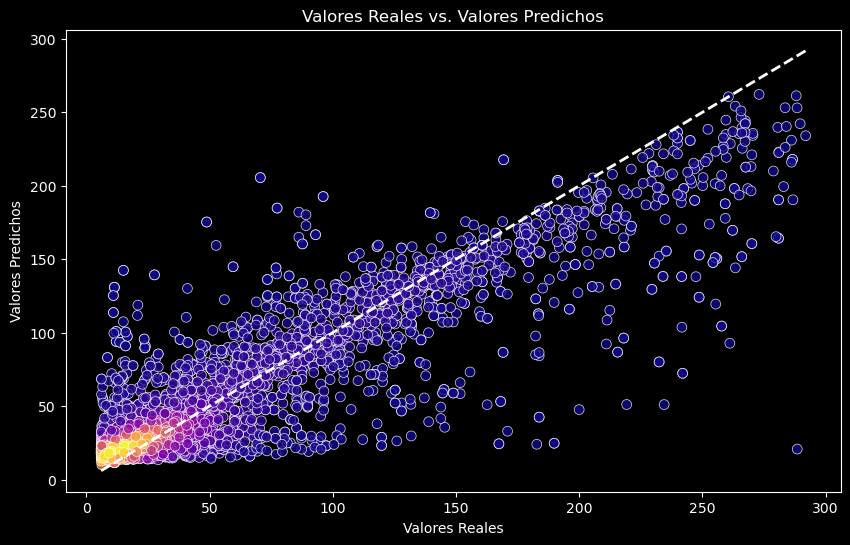

In [156]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Calcular la densidad de puntos
xy = np.vstack([y_test, y_pred])
z = gaussian_kde(xy)(xy)

# Crear un gráfico de dispersión con color basado en la densidad de puntos
plt.figure(figsize=(10, 6), facecolor='black')
scatter = plt.scatter(y_test, y_pred, c=z, s=50, cmap='plasma', edgecolor='white', alpha=0.8, linewidth=0.55)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=2)  # Línea de referencia en blanco
plt.xlabel('Valores Reales', color='white')
plt.ylabel('Valores Predichos', color='white')
plt.title('Valores Reales vs. Valores Predichos', color='white')

# Cambiar el color de los ejes y las etiquetas de los ticks
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

# Cambiar el color del fondo del gráfico
plt.gca().set_facecolor('black')

# Guardar el gráfico
plt.savefig('real_vs_predicho2.png', facecolor='black')

# Mostrar el gráfico
plt.show()


        Feature  Importance
1           B12    0.247717
17        slope    0.175979
16    elevation    0.093500
18        label    0.068050
0           B11    0.056124
14  VV_minus_VH    0.039102
6         MNDWI    0.035426
3            B3    0.033559
10           VH    0.031050
7          NDBI    0.030982
5            B8    0.030365
11           VV    0.025878
2            B2    0.025590
8          NDVI    0.025395
4            B4    0.022334
13    VV_div_VH    0.018028
9           RVI    0.016106
12  VV_VH_div_2    0.012610
15   VV_plus_VH    0.012207


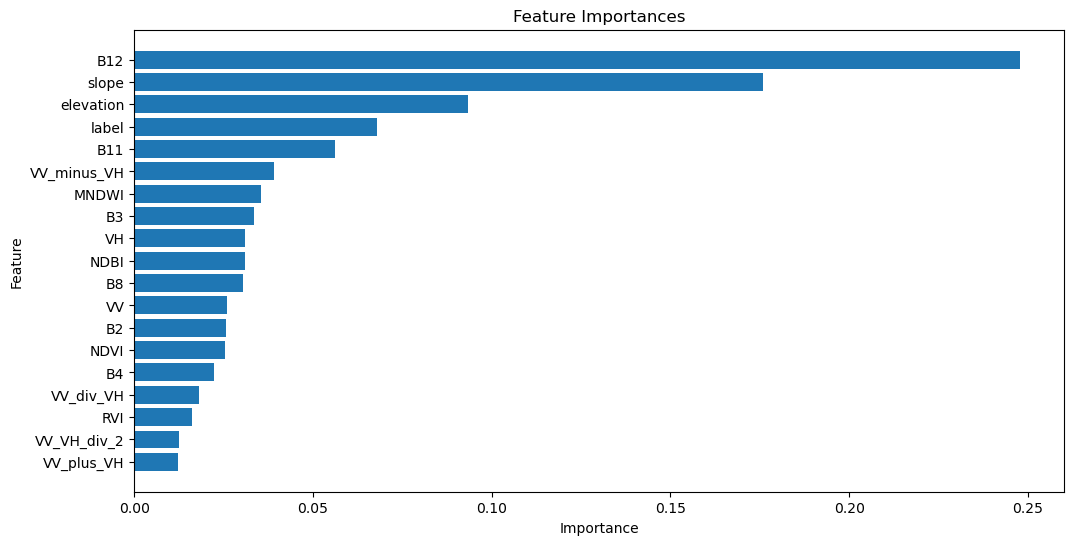

In [167]:
import matplotlib.pyplot as plt
# Obtener la importancia de las características
feature_importances = rf.feature_importances_

# Crear un DataFrame para organizar las importancias de las características
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Mostrar las importancias de las características
print(feature_importances_df)

# Graficar las importancias de las características
plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [181]:
# convert the estimator into a list of strings
# this function also works with the ensemble.ExtraTrees estimator
trees = ml.rf_to_strings(rf, feature_names,output_mode='regression')
# print the first tree to see the result
# print(trees[0])

In [20]:
# create a ee classifier to use with ee objects from the trees
ee_classifier = ml.strings_to_classifier(trees)
# ee_classifier.getInfo()

In [133]:
user_id = 'users/facuboladerasgee'
# specify asset id where to save trees
# be sure to change  to your ee user name
asset_id = user_id + "/Rf_Malawi_"
asset_id
# kick off an export process so it will be saved to the ee asset
ml.export_trees_to_fc(trees, asset_id)

In [218]:
def export_model_in_parts(model, feature_names, user_id, base_asset_id, part_size=3):
    trees = ml.rf_to_strings(model, feature_names, output_mode='regression')
    total_trees = len(trees)
    
    # Dividir los árboles en partes
    for i in range(0, total_trees, part_size):
        part_trees = trees[i:i+part_size]
        part_asset_id = f"{base_asset_id}_part_{i//part_size}"
        
        # Exportar la parte
        ml.export_trees_to_fc(part_trees, part_asset_id)
        print(f"Parte {i//part_size} exportada a {part_asset_id}")

# Ejemplo de uso:
user_id = 'users/facuboladerasgee'
base_asset_id = f"{user_id}/Rf_Malawi_Join"
export_model_in_parts(rf, feature_names, user_id, base_asset_id)

Parte 0 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_0
Parte 1 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_1
Parte 2 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_2
Parte 3 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_3
Parte 4 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_4
Parte 5 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_5
Parte 6 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_6
Parte 7 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_7
Parte 8 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_8
Parte 9 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_9
Parte 10 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_10
Parte 11 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_11
Parte 12 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_12
Parte 13 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_13
Parte 14 exportada a users/facuboladerasgee/Rf_Malawi_Join_part_14
Parte 15 export

In [ ]:
# # Exporta la imagen a Google Cloud Storage
# task = ee.batch.Export.image.toCloudStorage(
#     image=image,
#     description='Sentinel-2_export',
#     bucket='your_bucket_name',  # Reemplaza con el nombre de tu bucket
#     fileNamePrefix='sentinel-2_export',
#     scale=30,
#     region=region,
#     maxPixels=1e13  # Ajusta el límite de píxeles si es necesario
# )

# # Inicia la tarea de exportación
# task.start()

# print('Export task started. Check the GCS bucket for the exported files.')

# Prueba Modelo

In [21]:
# Definir la región de interés
roi = ee.FeatureCollection('projects/facub-gee/assets/Nepal')
# Centrar el mapa en la región de interés
Map = geemap.Map(center=[0, 0], zoom=2)
# Añadir Google Satellite como mapa base
Map.add_basemap('SATELLITE')
Map.centerObject(roi)


# Parámetros de visualización para imágenes multiespectrales en falso color nir-swir1-swir2
visFalseColor = {
    'min': 0,
    'max': 3000,
    'bands': ['B8', 'B11', 'B12']
}

# Parámetros de visualización para la biomasa
visBiomass = {'min': 0, 'max': 100, 'palette': ['lightyellow', 'lightgreen', 'green', 'darkgreen']}

# Parámetros de visualización para Sentinel-1
visParamsS1 = {
    'min': -25,
    'max': 0,
    'bands': ['VV', 'VH']
}

# Definir el año de análisis
year = 2020

# Definir la fecha de inicio y fin para filtrar la colección
start = f'{year}-01-01'
end = f'{year}-12-31'

# Filtrar la colección Sentinel-2
s2Col = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(roi) \
    .filterDate(start, end)

# Filtrar la colección Sentinel-2 cloud score
cloudCol = ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY') \
    .filterBounds(roi) \
    .filterDate(start, end)

# Combinar la colección, máscara de nubes y hacer un composite mediano
def mask_clouds(image):
    cloud_score = ee.Image(cloudCol.filterMetadata('system:index', 'equals', image.get('system:index')).first())
    mask = cloud_score.select('probability').lt(10)
    return image.updateMask(mask)

image = s2Col.map(mask_clouds).median().toFloat().clip(roi)

# Calcular NDVI y MNDWI
ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')
# Calcular NDBI
ndbi = image.normalizedDifference(['B11', 'B8']).rename('NDBI')

# Añadir bandas NDVI, MNDWI y NDBI a la imagen
image = image.addBands(ndvi).addBands(mndwi).addBands(ndbi)

# Integrar la banda "label" de Dynamic World
dwCol = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1') \
    .filterBounds(roi) \
    .filterDate(start, end)

dwLabel = dwCol.select('label').median().clip(roi)


# Añadir la banda "label" de Dynamic World a la imagen
image = image.addBands(dwLabel.rename('label'))

# Cargar la imagen de altura de dosel
canopy_height = ee.Image("users/nlang/ETH_GlobalCanopyHeight_2020_10m_v1")

# Recortar la imagen de altura de dosel a la ROI
canopy_height = canopy_height.clip(roi)

# Agregar la banda de altura de dosel a la imagen de datos de biomasa de GEDI
image = image.addBands(canopy_height.rename('CH'))


# Definir las bandas para predecir la biomasa
bands = ['B11', 'B12', 'B2', 'B3', 'B4', 'CH', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'VH', 'VV', 'VV_VH_div_2', 'VV_div_VH', 'VV_minus_VH', 'VV_plus_VH', 'elevation', 'slope']


# Función de preprocesamiento
def preprocess(image):
    # Aplicar corrección de ángulo de incidencia
    # image = apply_incidence_angle_correction(image)
    # Filtrado de Speckle
    speckle_filtered = image.focal_median(kernelType='circle', radius=50, units='meters')

    return speckle_filtered
# Definir la función de máscara de borde
def mask_edge(image):
    edge = image.lt(-30.0)
    masked_image = image.mask().And(edge.Not())
    return image.updateMask(masked_image)

# Filtrar y procesar la colección Sentinel-1 para VV
img_vv = (
    ee.ImageCollection('COPERNICUS/S1_GRD')
    .filterBounds(roi)
    .filterDate(start, end)
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))
    .filter(ee.Filter.eq('instrumentMode', 'IW'))
    .select('VV')

    .map(mask_edge)
    .map(preprocess)
)

# Filtrar y procesar la colección Sentinel-1 para VH
img_vh = (
    ee.ImageCollection('COPERNICUS/S1_GRD')
    .filterBounds(roi)
    .filterDate(start, end)
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH'))
    .filter(ee.Filter.eq('instrumentMode', 'IW'))
    .select('VH')

    .map(mask_edge)
    .map(preprocess)
)


# Promedio de imágenes VV y VH
s1_vv = img_vv.median().rename('VV')
s1_vh = img_vh.median().rename('VH')



# Calcular el índice RVI
rvi = s1_vh.divide(s1_vv.add(s1_vh)).multiply(4).rename('RVI')
vv_plus_vh = s1_vv.add(s1_vh).rename('VV_plus_VH')
vv_minus_vh = s1_vv.subtract(s1_vh).rename('VV_minus_VH')
vv_div_vh = s1_vv.divide(s1_vh).rename('VV_div_VH')
vv_vh_div_2 = s1_vv.add(s1_vh).divide(2).rename('VV_VH_div_2')

# Combinar las bandas VV, VH y RVI en una sola imagen
s1_combined = ee.Image.cat([s1_vv, s1_vh, vv_plus_vh, vv_minus_vh, vv_div_vh, vv_vh_div_2, rvi]).clip(roi)

# Añadir las bandas VV, VH, RVI y álgebra de bandas a la imagen
image = image.addBands(s1_combined)

# Añadir SRTM DEM y pendiente
dem = ee.Image('USGS/SRTMGL1_003').select('elevation').clip(roi)
slope = ee.Terrain.slope(dem).rename('slope').clip(roi)

# Añadir las bandas DEM y pendiente a la imagen
image = image.addBands(dem.rename('elevation'))
image = image.addBands(slope)

# Seleccionar solo las bandas especificadas
image = image.select(bands)


In [22]:
# classify the image again but with the classifier from the persisted trees
classified = image.select(feature_names).classify(ee_classifier)


# Centrar el mapa en la región de interés
Map = geemap.Map(center=[0, 0], zoom=2)
Map.centerObject(roi)

visPredictedBiomass = {
    'min': 0,
    'max': 60,
    'palette': ['lightyellow', 'lightgreen', 'green', 'darkgreen']
}

Map = geemap.Map(zoom=11)
Map.add_basemap('SATELLITE')
Map.centerObject(roi)

Map.addLayer(
    classified,
    visPredictedBiomass,
    "classification",)
Map.add_colorbar(visPredictedBiomass, label="Predicted Biomass")
Map

EEException: Request payload size exceeds the limit: 10485760 bytes.